### Regression Exercise 
# Moneyball The NBA
---

### This HW is not easy. TRY IT YOURSELF FIRST! 
Then If you are able to complete it, [watch this lecture series on it](https://ocw.mit.edu/courses/15-071-the-analytics-edge-spring-2017/pages/linear-regression/playing-moneyball-in-the-nba-recitation/video-1-the-data/). 

In [1]:
# PANDAS IS FOR DATA WRANGLING
import pandas as pd
import numpy as np

# SEABORN IS A PLOTTING LIBRARY
import seaborn as sns

# MATPLOT LIB IS ALSO A PLOTTING LIBRARY
import matplotlib.pyplot as plt

# SKLEARN IS OUR MACHINE LEARNING PACKAGE
from sklearn.linear_model import LinearRegression

# IMPORT OUR RANDOM FOREST REGERSSOR
from sklearn.ensemble import RandomForestRegressor

# METRICS HELP US SCORE OUR MODEL
from sklearn import metrics

# HELP US SPLIT OUR DATA INTO TESTING A TRAINING
from sklearn.model_selection import train_test_split

# Good ol statsmodels
import statsmodels.api as sm

# Specific root mean squared error for stats models
from statsmodels.tools.eval_measures import rmse


from statsmodels.stats.outliers_influence import variance_inflation_factor


from statsmodels.api import qqplot

import CTPLIB as ctp


# Remember our main steps motto _isbe_.
1. i - Inspect and explore data.
2. s - Select and engineer features.
3. b - Build and train model.
4. e - Evaluate model.

# STEP 1 (i): Inspect and explore data
1. Use `data/NBA_test.csv and data/NBA_train.csv`

In [2]:
# READ IN THE DATA USING PANDAS 
df = pd.read_csv('data/NBA_train.csv')


# DISPLAY THE FIRST 5 ROWS
df.head()

,SeasonEnd,Team,Playoffs,W,PTS,oppPTS,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV
0,1980,Atlanta Hawks,1,50,8573,8334,3261,7027,3248,6952,13,75,2038,2645,1369,2406,1913,782,539,1495
1,1980,Boston Celtics,1,61,9303,8664,3617,7387,3455,6965,162,422,1907,2449,1227,2457,2198,809,308,1539
2,1980,Chicago Bulls,0,30,8813,9035,3362,6943,3292,6668,70,275,2019,2592,1115,2465,2152,704,392,1684
3,1980,Cleveland Cavaliers,0,37,9360,9332,3811,8041,3775,7854,36,187,1702,2205,1307,2381,2108,764,342,1370
4,1980,Denver Nuggets,0,30,8878,9240,3462,7470,3379,7215,83,255,1871,2539,1311,2524,2079,746,404,1533


```
SeasonEnd: Year season ended
Team: Name of team
Playoffs: If they made the playoffs. 1 == made to playoffs
W: Number of regular season in that season. 
PTS: Points scored in regular season. 
oppPTS: Opponent Points scored in regular season. 
FG: Field Goals made (total shots made == 2P and 3P combined)
FGA: Field Goals attempted (total shots attempted == 2P and 3P combined)
2P: two-pointers made
2PA: two-pointers attempted
3P: three-pointers made
3PA: three-pointers attempted
FT: Free-Throws made (not included in FG stat)
FTA: Free-Throws attempted (not included in FG stat)
ORB: Offensive Rebounds
DRB: Defensive Rebounds
AST: Assists made
STL: Steals 
BLK: Blocks 
TOV: Turnovers 
```

#### Inspect our data using `df.describe()` function.

In [3]:
# Inspect our data using `df.describe()` function.
df.describe()

,SeasonEnd,Playoffs,W,PTS,oppPTS,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV
count,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000
mean,1996.319760,0.574850,41.000000,8370.239521,8370.239521,3200.367665,6873.318563,2881.324551,5956.444311,319.043114,916.874251,1650.461078,2189.953293,1061.584431,2427.354491,1912.112575,668.364072,419.805988,1302.837126
std,9.243808,0.494662,12.740822,581.040114,587.543959,287.181266,401.027166,446.097941,830.596327,199.698941,523.982964,197.651728,244.491086,150.224519,130.671523,221.610925,93.393044,82.274913,153.973470
min,1980.000000,0.000000,11.000000,6901.000000,6909.000000,2565.000000,5972.000000,1981.000000,4153.000000,10.000000,75.000000,1189.000000,1475.000000,639.000000,2044.000000,1423.000000,455.000000,204.000000,931.000000
25%,1989.000000,0.000000,31.000000,7934.000000,7934.000000,2974.000000,6563.500000,2510.000000,5269.000000,131.500000,413.000000,1502.500000,2008.000000,953.500000,2346.500000,1735.000000,599.000000,359.000000,1192.000000
50%,1996.000000,1.000000,42.000000,8312.000000,8365.000000,3150.000000,6831.000000,2718.000000,5706.000000,329.000000,942.000000,1628.000000,2176.000000,1055.000000,2433.000000,1899.000000,658.000000,410.000000,1289.000000
75%,2005.000000,1.000000,50.500000,8784.500000,8768.500000,3434.500000,7157.000000,3296.000000,6753.500000,481.500000,1347.500000,1781.000000,2352.000000,1167.000000,2516.500000,2077.500000,729.000000,469.500000,1395.500000
max,2011.000000,1.000000,72.000000,10371.000000,10723.000000,3980.000000,8868.000000,3954.000000,7873.000000,841.000000,2284.000000,2388.000000,3051.000000,1520.000000,2753.000000,2575.000000,1053.000000,716.000000,1873.000000


#### Check for Nulls.

In [10]:
# Check for Nulls.
nulls = df.isnull().sum()

#### Check for Duplicates

In [11]:
# Check for Duplicates
duplicates = df.duplicated().sum()

#### Build a function that will INSPECT ANY DATAFRAME FOR YOU do this for you for any data frame you pass into it.

In [16]:
def inspect_dataframe(input_df):
    print(f'Shape of the data: {input_df.shape}')
    print(f'Data types: \n{input_df.dtypes}')
    print(f"Columns: {', '.join(input_df.columns)}")
    print(f'Null values: {input_df.isnull().sum().sum()}')
    print(f'Duplicates: {input_df.duplicated().sum()}')

inspect_dataframe(df)

Shape of the data: (835, 20)
Data types: 
SeasonEnd     int64
Team         object
Playoffs      int64
W             int64
PTS           int64
oppPTS        int64
FG            int64
FGA           int64
2P            int64
2PA           int64
3P            int64
3PA           int64
FT            int64
FTA           int64
ORB           int64
DRB           int64
AST           int64
STL           int64
BLK           int64
TOV           int64
dtype: object
Columns: SeasonEnd, Team, Playoffs, W, PTS, oppPTS, FG, FGA, 2P, 2PA, 3P, 3PA, FT, FTA, ORB, DRB, AST, STL, BLK, TOV
Null values: 0
Duplicates: 0


#### Get a sense of how many wins it will take to make the playoffs. 
Make a scatter plot with x=Wins and the y=Team, and the hue=Playoffs

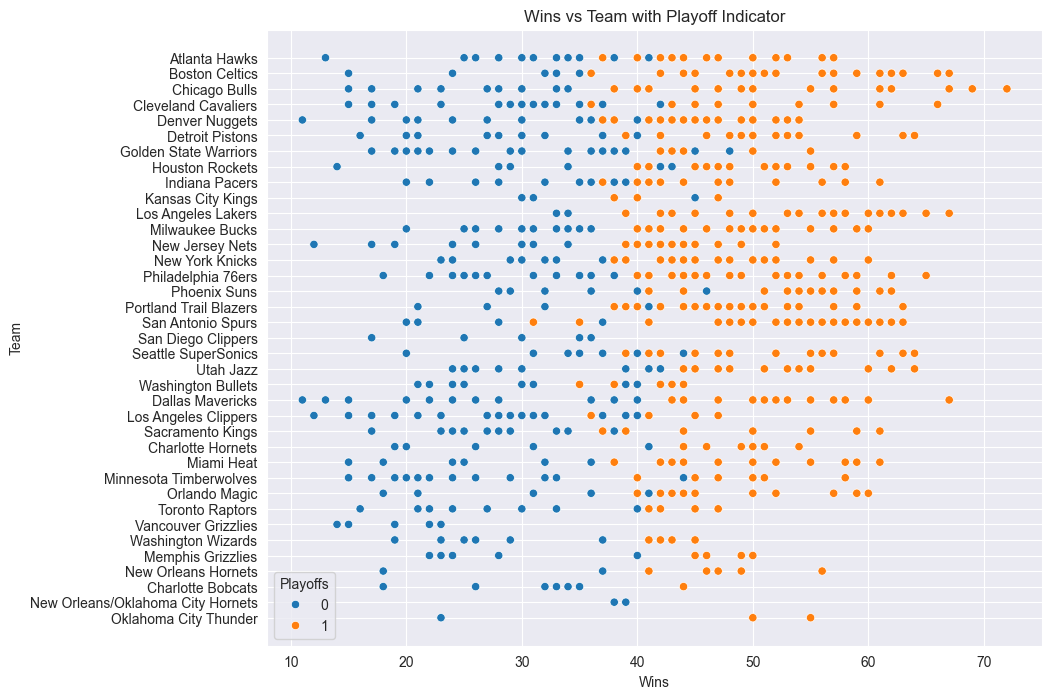

In [8]:
# Create a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='W', y='Team', hue='Playoffs', data=df)

# Add titles and labels
plt.title('Wins vs Team with Playoff Indicator')
plt.xlabel('Wins')
plt.ylabel('Team')

# Show plot
plt.show()

In [23]:
from scipy import stats

# Filter the dataframe for teams that did not make the playoffs
non_playoff_teams = df.query("Playoffs == 0")

# Compute the mean and standard deviation for the number of wins
mean_wins = non_playoff_teams['W'].agg('mean')
std_wins = non_playoff_teams['W'].agg('std')

# Determine the wins above which 95% of the non-playoff teams fall using scipy
wins_95_percentile = stats.scoreatpercentile(non_playoff_teams['W'], 95)

print(f'Mean Wins (Non-Playoff Teams): {mean_wins}')
print(f'Standard Deviation of Wins (Non-Playoff Teams): {std_wins}')
print(f'95th Percentile of Wins (Non-Playoff Teams): {wins_95_percentile}')

Mean Wins (Non-Playoff Teams): 29.174647887323943
Standard Deviation of Wins (Non-Playoff Teams): 7.895355824176368
95th Percentile of Wins (Non-Playoff Teams): 41.0


#### Take a rough estimate, and now use that moving forward.  



In [52]:
WINS_NEED_TO_MAKE_PLAYOFFS = 41

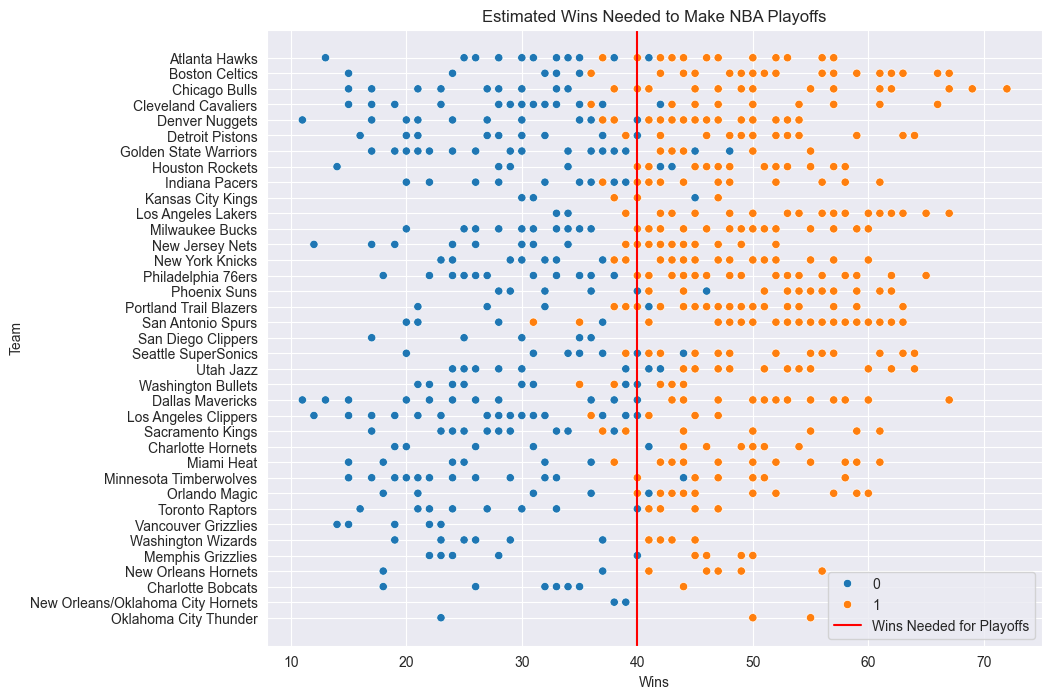

In [24]:
# Create a scatter plot with x=Wins, y=Team, and hue=Playoffs
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='W', y='Team', hue='Playoffs')

# Add titles and labels
plt.title('Estimated Wins Needed to Make NBA Playoffs')
plt.xlabel('Wins')
plt.ylabel('Team')
plt.axvline(x=WINS_NEED_TO_MAKE_PLAYOFFS, color='red', linestyle='-', label='Wins Needed for Playoffs')
plt.legend()

# Show plot
plt.show()

---

# Now do moneyball but for the NBA. 

#### I would like you to do try and do this on your own first.  

It's not easy, but its fun af.  

There is a guided lecture on how to do this that I can send you, but I'd like for you to try and figure it out on your own first.  

If you are fully stuck, ask in slack how other people did it if that doesn't work (I highly encourage collorbration and learning from eachother.  I still consider that doing it on your own.)  

If that doesn't work, DM me and I will send you the lectures explaining how to do the whole thing.

# Rough Guide a v1 model.
0. Make a model to predict PTS 
0. For v1, dont use `2P, 3P, FG, or FT`.  Instead use `2PA, 3PA, FTA`.  
0. Include any other cols use see fit.  


In [25]:
inspect_dataframe(df)

Shape of the data: (835, 20)
Data types: 
SeasonEnd     int64
Team         object
Playoffs      int64
W             int64
PTS           int64
oppPTS        int64
FG            int64
FGA           int64
2P            int64
2PA           int64
3P            int64
3PA           int64
FT            int64
FTA           int64
ORB           int64
DRB           int64
AST           int64
STL           int64
BLK           int64
TOV           int64
dtype: object
Columns: SeasonEnd, Team, Playoffs, W, PTS, oppPTS, FG, FGA, 2P, 2PA, 3P, 3PA, FT, FTA, ORB, DRB, AST, STL, BLK, TOV
Null values: 0
Duplicates: 0


In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import metrics
from scipy.stats import uniform

# Define the features and target variable
features = ['2PA', '3PA', 'FTA', 'W', 'oppPTS', 'ORB', 'DRB', 'AST', 'STL', 'BLK', 'TOV']
target = 'PTS'

# Split the data into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models to compare
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(max_iter=10000),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

# Track the best model and lowest RMSE
best_model_name = None
best_model = None
best_rmse = float('inf')

# Evaluate models using polynomial features and cross-validation
for name, model in models.items():
    pipeline = Pipeline([
        ('poly', PolynomialFeatures(degree=2, include_bias=False)),
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-cv_scores)
    mean_rmse = rmse_scores.mean()
    
    print(f'{name} with Polynomial Features CV RMSE: {mean_rmse}')
    
    # Select the model with the lowest RMSE
    if mean_rmse < best_rmse:
        best_rmse = mean_rmse
        best_model_name = name
        best_model = model

print(f'\nBest model based on CV RMSE: {best_model_name}')

# Hyperparameter tuning using RandomizedSearchCV for the best model
param_dist = {
    'n_estimators': [100, 200],
    'learning_rate': uniform(0.01, 0.1),
    'max_depth': [3, 5]
}

# Only applicable if the best model is one with relevant hyperparameters
if isinstance(best_model, GradientBoostingRegressor):
    random_search = RandomizedSearchCV(best_model, param_distributions=param_dist, cv=5, n_iter=10, scoring='neg_mean_squared_error', random_state=42)

    # Pipeline for polynomial features, scaling, and best model
    final_pipeline = Pipeline([
        ('poly', PolynomialFeatures(degree=2, include_bias=False)),
        ('scaler', StandardScaler()),
        ('model', random_search)
    ])

    # Fit the pipeline
    final_pipeline.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = final_pipeline.predict(X_test)

    # Evaluate the final model
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse_value = np.sqrt(mse)
    r2 = metrics.r2_score(y_test, y_pred)

    print(f'\nFinal Model after Hyperparameter Tuning: {random_search.best_estimator_}')
    print(f'Final Model RMSE: {rmse_value}')
    print(f'Final Model R²: {r2}')
else:
    # If the best model is not Gradient Boosting (no hyperparameter tuning), fit it directly
    pipeline = Pipeline([
        ('poly', PolynomialFeatures(degree=2, include_bias=False)),
        ('scaler', StandardScaler()),
        ('model', best_model)
    ])

    # Train the best model
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Evaluate the best model
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse_value = np.sqrt(mse)
    r2 = metrics.r2_score(y_test, y_pred)

    print(f'\nFinal Model: {best_model_name}')
    print(f'Final Model RMSE: {rmse_value}')
    print(f'Final Model R²: {r2}')

Linear Regression with Polynomial Features CV RMSE: 90.49006727859583
Ridge with Polynomial Features CV RMSE: 86.81736955940084
Lasso with Polynomial Features CV RMSE: 86.05156489234369
Random Forest with Polynomial Features CV RMSE: 168.36830065148246
Gradient Boosting with Polynomial Features CV RMSE: 132.47948602240174

Best model based on CV RMSE: Lasso

Final Model: Lasso
Final Model RMSE: 84.39962984980214
Final Model R²: 0.9801375638562482


In [53]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Assuming df has columns for 'PTS' (points scored), 'oppPTS' (points allowed), and 'W' (wins)

# Step 1: Add 'points_diff' (points differential) to the DataFrame
df['points_diff'] = df['PTS'] - df['oppPTS']

# Define the features and target variable (using points_diff and other relevant features)
features = ['2PA', '3PA', 'FTA', 'points_diff', 'ORB', 'DRB', 'AST', 'STL', 'BLK', 'TOV']
target = 'W'

# Step 2: Split the data into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Step 3: Train the model to predict wins (W) based on points_diff and other features
model.fit(X_train, y_train)

# Step 4: Extract the intercept and points_diff coefficient
coef_y_int = model.intercept_
coef_points_diff = model.coef_[features.index('points_diff')]

threshold_wins = WINS_NEED_TO_MAKE_PLAYOFFS  

# Step 6: Calculate the minimum points differential needed to achieve the threshold wins
min_pts_diff = (threshold_wins - coef_y_int) / coef_points_diff

# Output the results
print(f"Intercept (constant term): {coef_y_int}")
print(f"Points Differential Coefficient: {coef_points_diff}")
print(f"Wins needed to make playoffs: {threshold_wins}")
print(f"Minimum Season Points Differential needed to make playoffs: {min_pts_diff:.2f}")

Intercept (constant term): 34.50487916849252
Points Differential Coefficient: 0.031243110124562937
Wins needed to make playoffs: 41
Minimum Season Points Differential needed to make playoffs: 207.89
